In [20]:
#the *import*ant stuff haha
import pandas as pd
%matplotlib inline
import geopandas
import matplotlib.pyplot as plt
import pylab
neighborhoods = geopandas.read_file("Neighborhoods_.shp")

In [22]:
###### read the file
pool = pd.read_csv("pool.csv", parse_dates=True)

num_pools = pool.groupby("neighborhood").size()
num_pools.sort_values(ascending=False)

neighborhood
South Side Flats            2
Highland Park               2
Allegheny Center            1
Lincoln Place               1
Troy Hill                   1
Squirrel Hill South         1
South Side Slopes           1
Sheraden                    1
Shadyside                   1
Polish Hill                 1
Perry North                 1
Mount Washington            1
Lincoln-Lemington-Belmar    1
Homewood South              1
Banksville                  1
Hazelwood                   1
Greenfield                  1
East Hills                  1
Carrick                     1
Brookline                   1
Brighton Heights            1
Bloomfield                  1
Beltzhoover                 1
Beechview                   1
Bedford Dwellings           1
Westwood                    1
dtype: int64

In [24]:
neighborhoods = geopandas.read_file("Neighborhoods_.shp") # read in the shapefile

In [26]:
num_pools = num_pools.reset_index()
num_pools.columns = ["neighborhood", "pool_count"]

# Now perform the merge
pools_map = neighborhoods.merge(num_pools, how="left", left_on="hood", right_on="neighborhood")

<Axes: xlabel='neighborhood'>

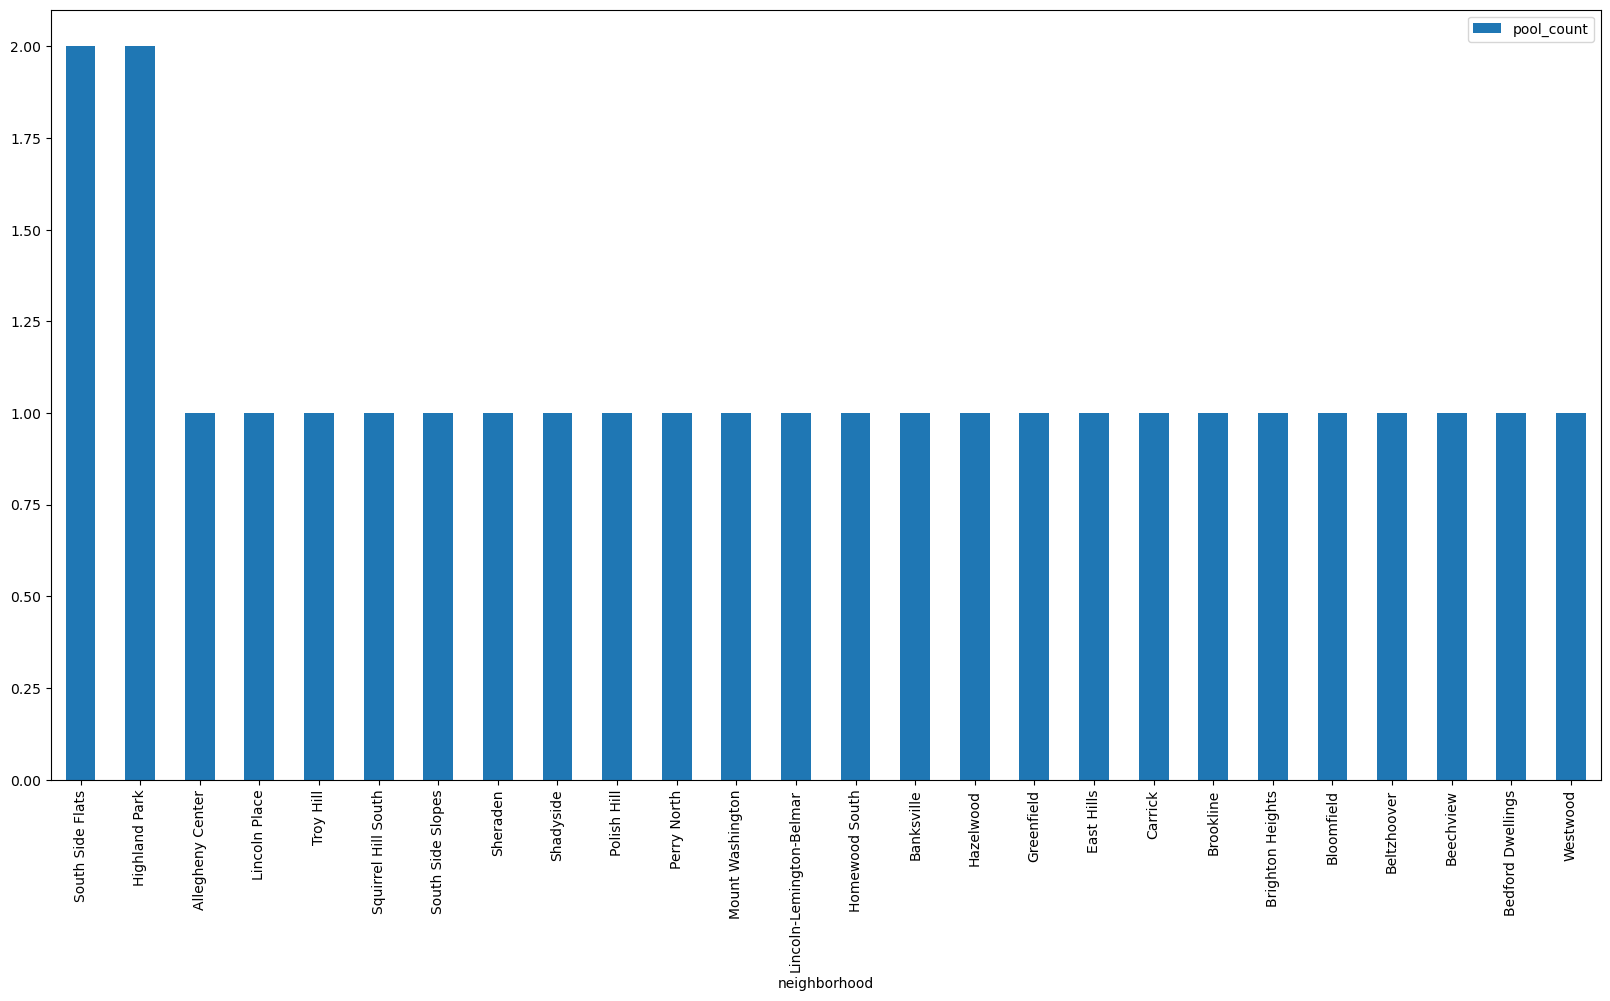

In [28]:
num_pools_sorted = num_pools.sort_values(by='pool_count', ascending=False)
pylab.figure(figsize=(20, 10))
ax=pylab.gca()
num_pools_sorted.plot(kind='bar', x='neighborhood', y='pool_count', ax=ax)

<Axes: >

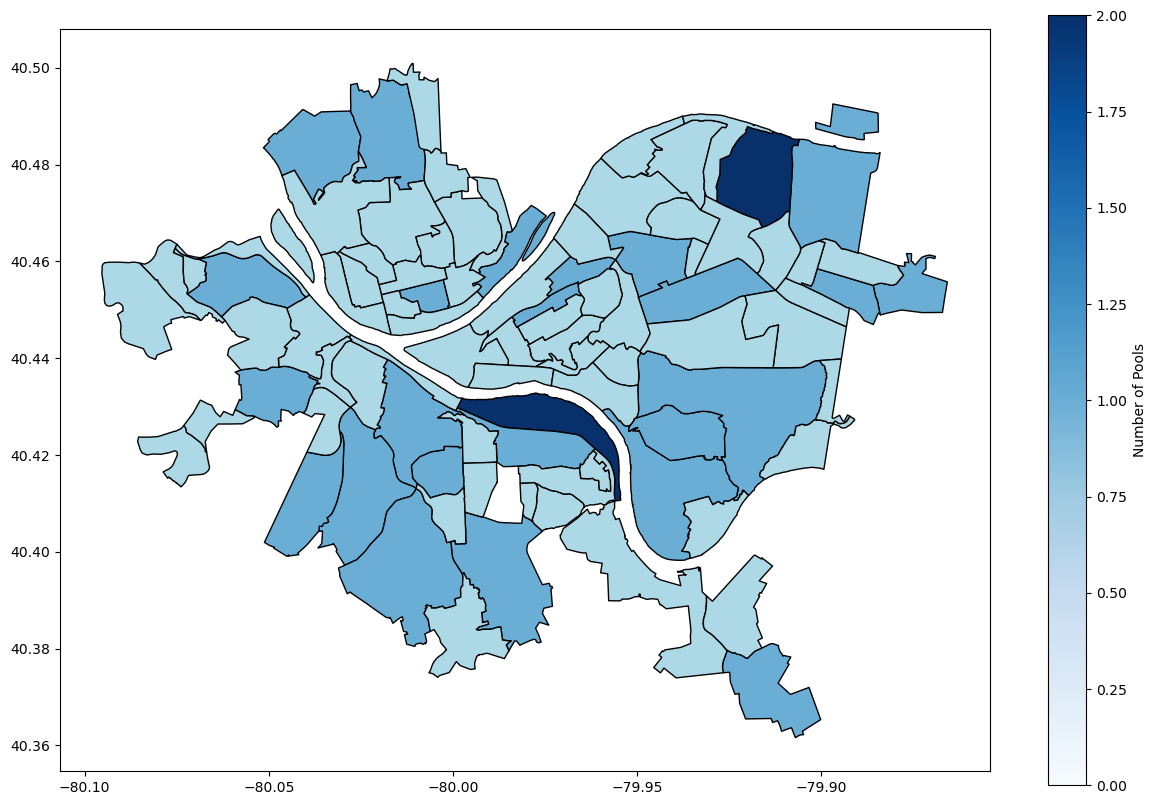

In [30]:

#creates the neighborhood plot with the merged data
pools_map.plot(column='pool_count', # set the data to be used for coloring
               cmap='Blues',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Pools"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightblue"}, # set disctricts with no data to gray
               vmin=0)